# Activity 14

In [1]:
# Import the Libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np

Using TensorFlow backend.


Set the seed and initialize the network

In [2]:
np.random.seed(1)

# Initialising the CNN
classifier = Sequential()

Add the convolutional layers

In [3]:
#  Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPool2D(pool_size = (2, 2)))

# Add additional convolutional layer and pooling
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))

#  Flattening
classifier.add(Flatten())

Add dense layers to the network

In [4]:
# Full ANN Connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Create training and test data generators

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

Create training and test datasets

In [6]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10764 images belonging to 2 classes.
Found 2674 images belonging to 2 classes.


Fit the model to the training data

In [7]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 10000,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 2500)

Epoch 1/2
10000/10000 [==============================] - 5245s 524ms/step - loss: 0.2566 - accuracy: 0.8918 - val_loss: 0.1720 - val_accuracy: 0.8684
Epoch 2/2
10000/10000 [==============================] - 4179s 418ms/step - loss: 0.0950 - accuracy: 0.9639 - val_loss: 0.4761 - val_accuracy: 0.8646


Test the model on a new image.

Load the image and look at it

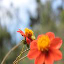

In [8]:
from keras.preprocessing import image
new_image = image.load_img('test_image_2.jpg', target_size = (64, 64))
new_image

Looks at the class labels

In [9]:
training_set.class_indices

{'car': 0, 'flower': 1}

Print the results

In [10]:
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)
result = classifier.predict(new_image)

if result[0][0] == 1:
    prediction = 'It is a flower'
else:
    prediction = 'It is a car'
print(prediction)

It is a flower
